In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('/g/g99/jamil1/lustre1/sensitivity/modules')

/p/lustre1/jamil1/sensitivity/work/SensitivityPaper2020_scripts/DiscoveryPotential


In [3]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
params = {'font.size':16,'font.family':'serif'}
plt.rcParams.update(params) 
import os

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [4]:
# Import the nEXO sensitivity classes

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood

In [5]:
from decimal import Decimal

def ProgressBar(count, total, phrase):
    barLength = 15 # Modify this to change the length of the progress bar
    status = '%d/%d' % (count+1, total)
    progress = (count+1)/float(total)
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    if count == total-1:
        progress = 1
        status = status+"           \n"
    block = int(round(barLength*progress))
    text = '\r%-*s [%s] %-*s %s' % (47,phrase,"#"*block+"-"*(barLength-block),8,'%.2f%%'%Decimal(progress*100),status)
    sys.stdout.write(text)
    sys.stdout.flush()

In [6]:
categories_list = ['DiscoveryPotential_NullHypothesis', 
                   'DiscoveryPotential_bb0n_1ct_10yrs', 
                   'DiscoveryPotential_bb0n_10ct_10yrs', 
                   'DiscoveryPotential_bb0n_20ct_10yrs', 
                   'DiscoveryPotential_bb0n_50ct_10yrs']


outputdir = '/g/g99/jamil1/lustre1/sensitivity/work/SensitivityPaper2020_scripts/DiscoveryPotential/test/h5/'

all_files = os.listdir(outputdir)
h5_files = [filename for filename in all_files if filename.endswith('.h5')]
print('Number of files {}'.format(len(h5_files)))
# print(h5_files)
dfdict = dict()

for category in categories_list:
    print('Loading data for {}'.format(category))
    df_list = [pd.read_hdf(outputdir+filename) for filename in h5_files if '_'+category+'_' in filename]
#     print(df_list)
    dfdict[category] = pd.concat(df_list,ignore_index=True)
#     print('---> Loaded {} toy datasets'.format(len(dfdict[category])))


Number of files 294
Loading data for DiscoveryPotential_NullHypothesis
Loading data for DiscoveryPotential_bb0n_1ct_10yrs
Loading data for DiscoveryPotential_bb0n_10ct_10yrs
Loading data for DiscoveryPotential_bb0n_20ct_10yrs
Loading data for DiscoveryPotential_bb0n_50ct_10yrs


In [7]:
# Get the median values of lambda

maskdict = dict()

for key, df in dfdict.items():
    print('Running {}'.format(key))
    
    good_fit_mask = []
    
    for index,row in df.iterrows():
        if np.sum(row['fixed_fit_acc_covar']) < len(row['fixed_fit_acc_covar'])-1:
            good_fit_mask.append(False)
        else:
            good_fit_mask.append(True)
            
    maskdict[key] = np.array(good_fit_mask)
    print('---> Convergence fraction: {:3.3}'.format(np.sum(maskdict[key])/len(maskdict[key])))
            
    
        

Running DiscoveryPotential_NullHypothesis
---> Convergence fraction: 1.0
Running DiscoveryPotential_bb0n_1ct_10yrs
---> Convergence fraction: 1.0
Running DiscoveryPotential_bb0n_10ct_10yrs
---> Convergence fraction: 1.0
Running DiscoveryPotential_bb0n_20ct_10yrs
---> Convergence fraction: 1.0
Running DiscoveryPotential_bb0n_50ct_10yrs
---> Convergence fraction: 1.0


Running DiscoveryPotential_NullHypothesis
going through toy datasets                      [###############] 100.00%  9000/9000           


/collab/usr/gapps/python/build/spack-toss3.3/opt/spack/linux-rhel7-x86_64/gcc-4.9.3/python-3.7.2-asydydmavj2puklmx5t6cu3ruzmg2b3a/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


Running DiscoveryPotential_bb0n_1ct_10yrs
going through toy datasets                      [###############] 100.00%  990/990           
Running DiscoveryPotential_bb0n_10ct_10yrs
going through toy datasets                      [###############] 100.00%  1000/1000           
Running DiscoveryPotential_bb0n_20ct_10yrs
going through toy datasets                      [###############] 100.00%  300/300           
Running DiscoveryPotential_bb0n_50ct_10yrs
going through toy datasets                      [###############] 100.00%  800/800           


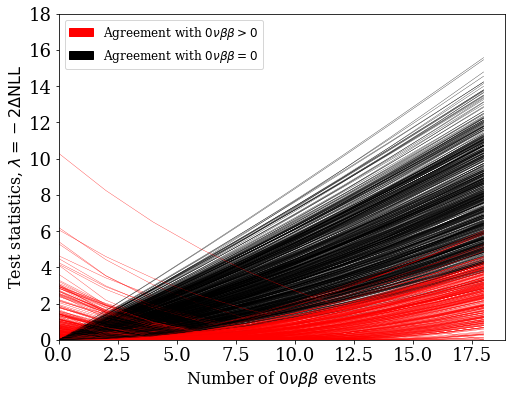

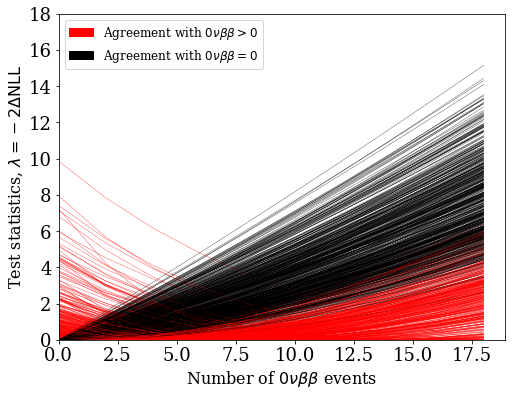

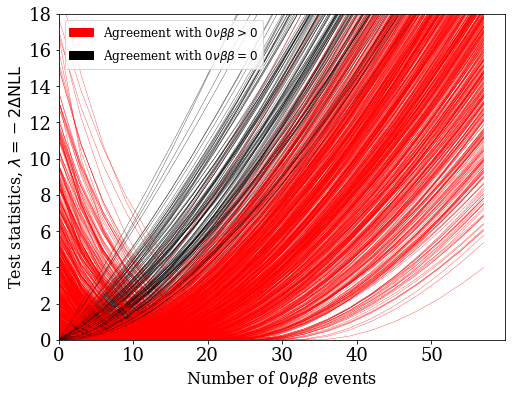

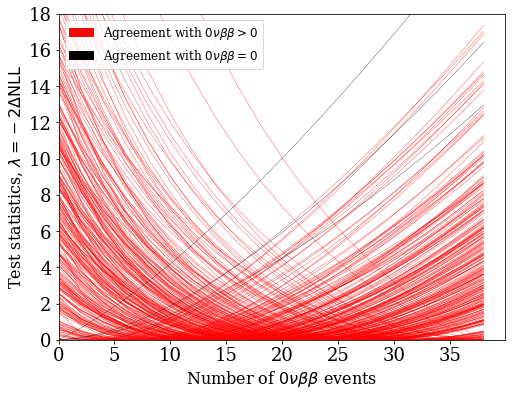

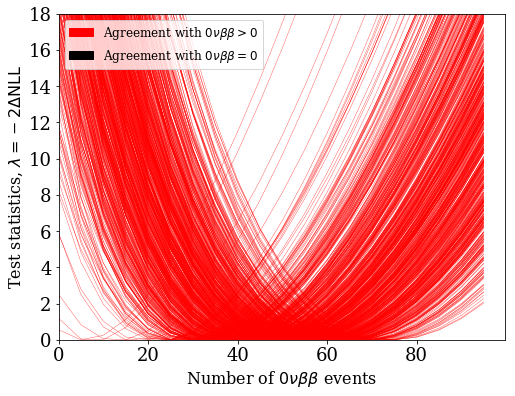

In [8]:
histdict = dict()
mediandict = dict()

import matplotlib.patches as mpatches

DeltaNLL = {}
for key, df in dfdict.items():
    print('Running {}'.format(key))
    
    DeltaNLL[key] = []
    
    fig = plt.figure(figsize=(8,6))
    for ii,x in enumerate(dfdict[key]['lambda'].loc[maskdict[key]]): 
        ProgressBar(ii,len(dfdict[key]['lambda'].loc[maskdict[key]]),'going through toy datasets')
        if key == 'DiscoveryPotential_NullHypothesis':
            DeltaNLL[key].append(x[0]-np.min(x))
        else: 
            DeltaNLL[key].append(x[0]-np.min(x))
        if ii<1000:
            if np.abs(x[0]-np.min(x)) < 0.01: 
                plt.plot(dfdict[key]['num_signal'].loc[maskdict[key]][ii], x-np.min(x), label='toy %d' % ii, lw=0.3, color='k')
            else:
                plt.plot(dfdict[key]['num_signal'].loc[maskdict[key]][ii], x-np.min(x), label='toy %d' % ii, lw=0.3, color='r')


    plt.xlabel(r'Number of $0\nu\beta\beta$ events', fontsize=16)
    plt.ylabel(r'Test statistics, $\lambda = -2\Delta\mathrm{NLL}$', fontsize=16)
    plt.xlim(xmin=0)
    plt.ylim(0,18)
    red_patch = mpatches.Patch(color='red', label=r'Agreement with $0\nu\beta\beta>0$ ')
    black_patch = mpatches.Patch(color='k', label=r'Agreement with $0\nu\beta\beta=0$ ')
    plt.legend(handles=[red_patch, black_patch], fontsize=12, loc='upper left')
    plt.savefig('profile_likelihood_%s.pdf' % key, bbox_inches='tight')

In [9]:
zvals = 1 - np.array([0.158655, 0.02275, 0.00135])

In [10]:
for key in DeltaNLL.keys():  
    DeltaNLL[key] = np.array(DeltaNLL[key])/2.0

In [11]:
colors = ['blue', 'red', 'green', 'orange', 'violet']
label = [1,10,20,50]

/g/g99/jamil1/local/toss_3_x86_64/lib/python3.7/site-packages/numpy/ma/core.py:6717: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


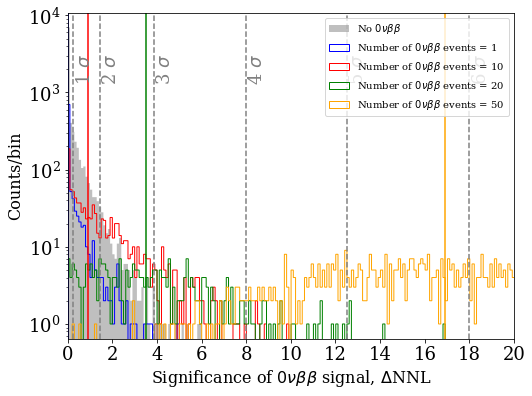

In [12]:
from scipy.stats import chi2
import scipy.stats as st

fig = plt.figure(figsize=(8,6))

hist = {}
hist['DiscoveryPotential_NullHypothesis'] = plt.hist(np.abs(DeltaNLL['DiscoveryPotential_NullHypothesis']), 
                                                     bins=np.linspace(0,100,1000), 
                                                     label=r'No $0\nu\beta\beta$', 
                                                     histtype='stepfilled', 
                                                     color='grey', 
                                                     alpha=0.5)

medians = []
for ii,key in enumerate(categories_list[1:]):
    hist[key] = plt.hist(np.abs(DeltaNLL[key]), 
                         bins=np.linspace(0,100,1000), 
                         label=r'Number of $0\nu\beta\beta$ events = %d' % label[ii], 
                         histtype='step', 
                         color=colors[ii])
    plt.axvline(x=np.median(sorted(np.abs(DeltaNLL[key]))), ymin=0, ymax=1000, ls='-', color=colors[ii])
    medians.append(np.median(sorted(np.abs(DeltaNLL[key]))))

xmax = 20
plt.xlim(0,xmax)
plt.xticks(np.arange(0,xmax+0.1,xmax/10.0))
plt.yscale('log')
plt.xlabel(r'Significance of $0\nu\beta\beta$ signal, $\Delta$NNL', fontsize=16)
plt.ylabel('Counts/bin', fontsize=16)
plt.legend(loc='upper right', fontsize=10)

for ii,zval in enumerate(zvals):  
    index = int(st.norm.cdf(ii+1)*len(np.abs(DeltaNLL['DiscoveryPotential_NullHypothesis'])))
    xpos = sorted(np.abs(DeltaNLL['DiscoveryPotential_NullHypothesis']))[index]
    plt.axvline(x=xpos, ymin=0, ymax=1000, ls='--', color='grey')
    plt.text(xpos+0.1, np.max(hist['DiscoveryPotential_NullHypothesis'][0])*0.3,r'%d $\sigma$' % (ii+1),rotation=90, color='grey')

# Significance assuming Wilks' theorem for sigma > 3
# see slide 11 in https://indico.cern.ch/event/162087/contributions/235303/attachments/189340/265790/cowan_cargese_2.pdf
for sigma in [4,5,6]:
    plt.axvline(x=sigma**2/2.0, ymin=0, ymax=1000, ls='--', color='grey')
    plt.text(sigma**2/2.0+0.1, np.max(hist['DiscoveryPotential_NullHypothesis'][0])*0.3,r'%d $\sigma$' % (sigma),rotation=90, color='grey')

    
plt.savefig('null_hypothesis.pdf', bbox_inches='tight')

In [13]:
import scipy.stats as st

sorted_nll = sorted(np.abs(DeltaNLL['DiscoveryPotential_NullHypothesis']))
for ii,key in enumerate(categories_list[1:]):
    diff_abs = np.abs(sorted_nll - medians[ii])
    nll_val = np.min(diff_abs)
    cut = np.where(diff_abs == nll_val)[0][0]
    print(key, nll_val, cut, cut/len(sorted_nll), st.norm.ppf(cut/len(sorted_nll)), np.sqrt(2*medians[ii]))

DiscoveryPotential_bb0n_1ct_10yrs 0.0 0 0.0 -inf 0.0
DiscoveryPotential_bb0n_10ct_10yrs 0.00020542591078565042 8556 0.9506666666666667 1.6513522613502416 1.3654729231856484
DiscoveryPotential_bb0n_20ct_10yrs 0.009814947202808177 8981 0.9978888888888889 2.8610636894970463 2.6569253201675416
DiscoveryPotential_bb0n_50ct_10yrs 10.929807329529316 8999 0.9998888888888889 3.692314726024295 5.813947803394534


In [16]:
sign = [1.6513522613502416, 2.8610636894970463, 5.813947803394534]
numbb0n = [10,20,50] 

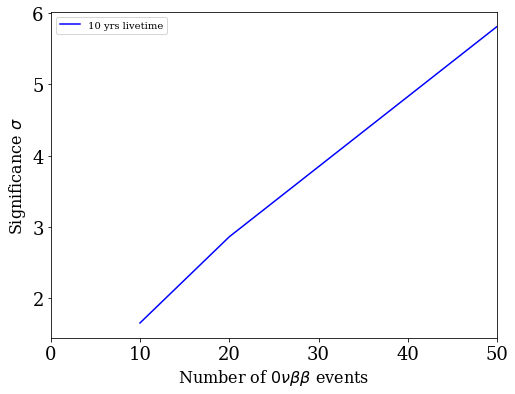

In [25]:
fig = plt.figure(figsize=(8,6))
plt.plot(numbb0n, sign, label='10 yrs livetime')

plt.xlim(0,50)
plt.xlabel(r'Number of $0\nu\beta\beta$ events', fontsize=16)
plt.ylabel(r'Significance $\sigma$ ', fontsize=16)
plt.legend(loc='upper left', fontsize=10)

